<a href="https://colab.research.google.com/github/balas05/CODSOFT/blob/main/movie_genere_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data=pd.read_csv("train_data.txt",delimiter=':::',header=None)
train_data.columns=['ID','TITLE','GENRE','DESCRIPTION']
train_data.to_csv('train_data.csv',index=None)

<ipython-input-2-4f2b22cc39f7>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data=pd.read_csv("train_data.txt",delimiter=':::',header=None)


In [ ]:
test_solution=pd.read_csv("test_data_solution.txt",delimiter=':::',header=None)
test_solution.columns=['ID','TITLE','GENRE','DESCRIPTION']
test_solution.to_csv('test_data_solution.csv',index=None)

<ipython-input-3-33aa71607281>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_solution=pd.read_csv("test_data_solution.txt",delimiter=':::',header=None)


In [ ]:
test_data=pd.read_csv('test_data_solution.csv')
test_data.head()
test_data.shape

(54200, 4)

In [ ]:
train_data=pd.read_csv('train_data.csv')
train_data.head()
train_data.shape

(54214, 4)

In [ ]:
df=pd.concat([train_data,test_data],ignore_index=True)
df=df.drop(['ID'],axis=1)
df

,TITLE,GENRE,DESCRIPTION
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
108409,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
108410,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
108411,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
108412,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [ ]:
df.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

<Axes: xlabel='GENRE', ylabel='count'>

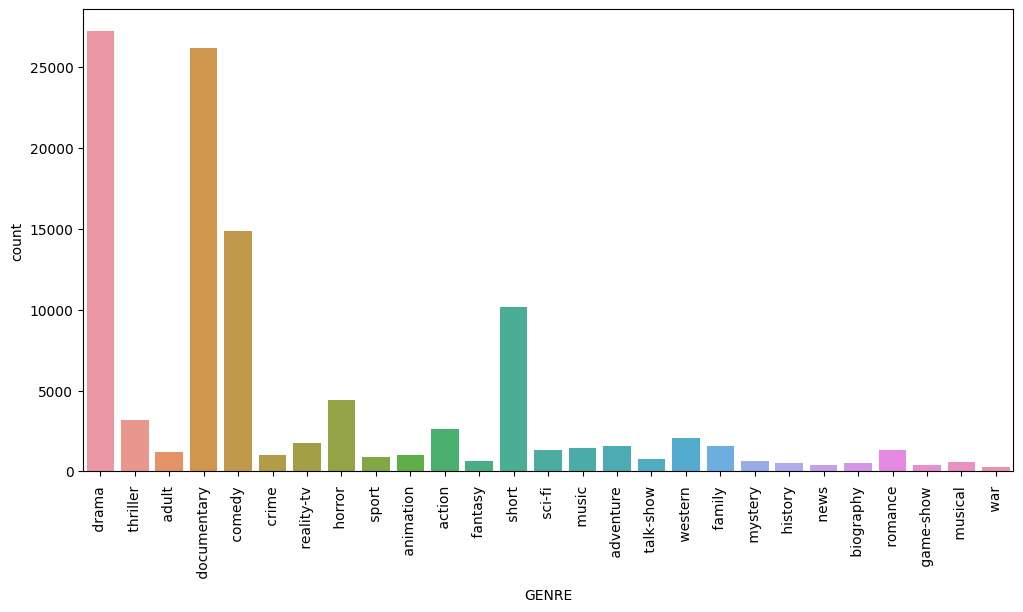

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(data=df,x='GENRE')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['genre_code']=le.fit_transform(df['GENRE'])
df.head()

,TITLE,GENRE,DESCRIPTION,genre_code
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [ ]:
dict(zip(le.classes_,le.transform(le.classes_)))


{' action ': 0,
 ' adult ': 1,
 ' adventure ': 2,
 ' animation ': 3,
 ' biography ': 4,
 ' comedy ': 5,
 ' crime ': 6,
 ' documentary ': 7,
 ' drama ': 8,
 ' family ': 9,
 ' fantasy ': 10,
 ' game-show ': 11,
 ' history ': 12,
 ' horror ': 13,
 ' music ': 14,
 ' musical ': 15,
 ' mystery ': 16,
 ' news ': 17,
 ' reality-tv ': 18,
 ' romance ': 19,
 ' sci-fi ': 20,
 ' short ': 21,
 ' sport ': 22,
 ' talk-show ': 23,
 ' thriller ': 24,
 ' war ': 25,
 ' western ': 26}

In [ ]:
df['DESCRIPTION'][0]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

In [ ]:
stemmer = PorterStemmer()
def preprocess(text):
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return (' '.join(stemmed_tokens))

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df['desc']=df['DESCRIPTION'].apply(lambda x:preprocess(x))

In [ ]:
preprocess(df['DESCRIPTION'][0])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df.head()

,TITLE,GENRE,DESCRIPTION,genre_code,desc
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8,listen convers doctor parent 10yearold oscar l...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24,brother sister past incestu relationship curre...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1,bu empti student field trip museum natur histo...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8,help unemploy father make end meet edith twin ...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8,film titl refer unrecov bodi ground zero also ...


In [ ]:
x=df['desc']
y=df['genre_code']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
x_tfidf = tfidf_vectorizer.fit_transform(x)
x_tfidf

<108414x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 3960983 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x_tfidf,y,test_size=0.3)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
def modelizer(clf):
    clf.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(x_test)

    # Evaluate the model
    print('\nAccuracy: ',accuracy_score(y_test, y_pred))
    print('\nClassification Report:\n',classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
modelizer(MultinomialNB())


Accuracy:  0.5293466564181399

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.14      0.22       823
           1       0.59      0.09      0.16       351
           2       0.68      0.12      0.20       464
           3       0.00      0.00      0.00       297
           4       0.00      0.00      0.00       172
           5       0.53      0.46      0.49      4467
           6       0.00      0.00      0.00       305
           7       0.56      0.87      0.68      7781
           8       0.47      0.81      0.59      8115
           9       0.75      0.01      0.01       480
          10       0.00      0.00      0.00       197
          11       0.97      0.28      0.43       118
          12       0.00      0.00      0.00       150
          13       0.71      0.41      0.52      1368
          14       0.71      0.22      0.33       439
          15       0.00      0.00      0.00       167
          16       0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
modelizer(LogisticRegression())


Accuracy:  0.5967409684857802

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.34      0.40       823
           1       0.70      0.30      0.42       351
           2       0.57      0.21      0.31       464
           3       0.39      0.10      0.16       297
           4       0.00      0.00      0.00       172
           5       0.54      0.62      0.58      4467
           6       0.31      0.04      0.07       305
           7       0.68      0.84      0.75      7781
           8       0.57      0.75      0.65      8115
           9       0.43      0.12      0.19       480
          10       0.46      0.06      0.11       197
          11       0.92      0.59      0.72       118
          12       0.00      0.00      0.00       150
          13       0.67      0.64      0.66      1368
          14       0.64      0.47      0.54       439
          15       0.62      0.03      0.06       167
          16       0.32  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
from sklearn import svm
modelizer(svm.SVC())